# Amazon Sales Report Data Analysis Project

## Introduction

In this data analysis project, I explore and analyze an Amazon sales report using Python and popular data science libraries such as Pandas, Matplotlib, and Seaborn. The goal is to derive meaningful insights and showcase data visualization skills.

## Import Python Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Load the Data

In [51]:
df = pd.read_csv('Amazon Sale Report.csv')

## Explore the Data

In [52]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [54]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [55]:
df.describe(include = 'object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,128976,128976,128976,128976,128976,128976,128976,128976,128976,121176,128941,128941,128941,39263
unique,120229,91,13,2,2,2,9,11,4,1,8948,69,1,1
top,403-4984515-8861958,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,2085,77815,89713,128852,88630,50292,22373,109486,121176,11208,22272,128941,39263


In [56]:
df.shape

(128976, 21)

In [57]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

## Data Cleaning 

In [58]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [59]:
# Drop Column 'New' and 'PendingS'

df.drop(columns = ['New', 'PendingS'], axis = 1, inplace = True)

In [60]:
# Drop Null Values :

df.dropna(inplace = True)

In [61]:
# Change datatype of 'Date' from object to datetime:

df['Date'] = pd.to_datetime(df['Date'])

In [62]:
# Change datatype of 'ship-postal-code' from float to int:

df['ship-postal-code'] = df['ship-postal-code'].astype(int)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Qty                 37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object   

# Data Analysis and Visualization

## Sales Over Time

C:\Users\ratne\AppData\Local\Temp\ipykernel_15876\1164441813.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = 'Date', y = 'Amount', data = df, palette = 'YlGnBu', estimator = sum)


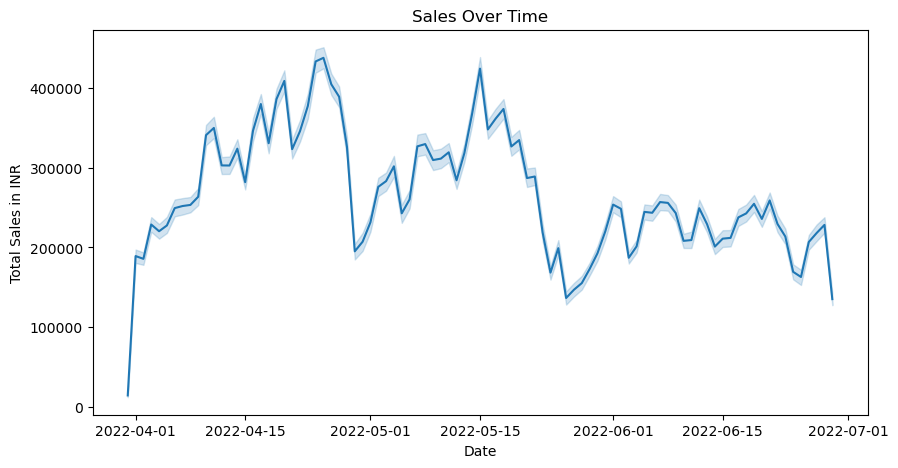

In [87]:
plt.figure(figsize = (10,5))
sns.lineplot(x = 'Date', y = 'Amount', data = df, palette = 'YlGnBu', estimator = sum)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales in INR')
plt.show()

   ## Product Size 

In [373]:
Total_Qty = df.groupby(['Size'], as_index = False)['Qty'].sum().sort_values(by = 'Qty', ascending = False)

In [374]:
Total_Qty

,Size,Qty
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


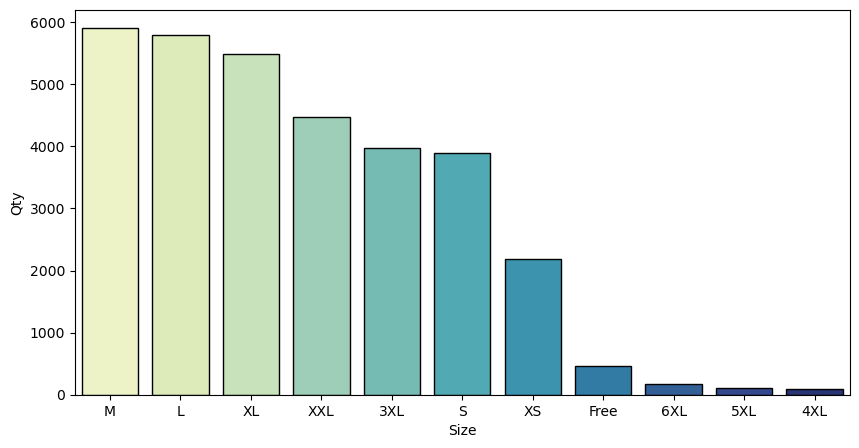

In [123]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Size', y = 'Qty', data =Total_Qty, edgecolor = 'Black', palette = 'YlGnBu')
plt.xticks()
plt.show()

### Size Analysis Summary

After analyzing the size distribution in the dataset, it is evident that the majority of customers prefer purchasing items in medium (M) size. This is followed by large (L) size, and extra-large (XL) size comes third in popularity.

The distribution is as follows:
- Medium (M) size accounts for the highest number of purchases.
- Large (L) size is the second most preferred choice among customers.
- Extra-large (XL) size has a lower frequency compared to M and L sizes.

This information provides valuable insights into customer preferences, which can be crucial for inventory management and product stocking decisions.

## Category

In [375]:
df['Category'].value_counts()

T-shirt     14062
Shirt       13595
Blazzer      6661
Trousers     2459
Perfume       295
Wallet        228
Socks         183
Shoes          31
Name: Category, dtype: int64

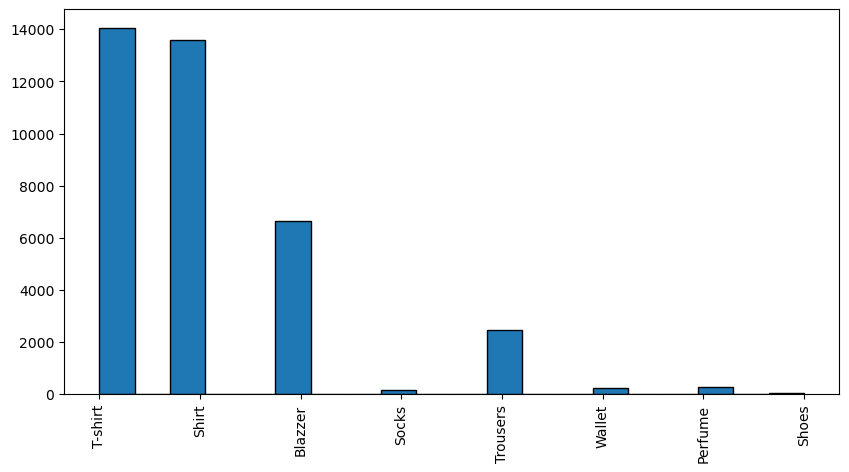

In [316]:
df['Category']  = df['Category'].astype(str)
column_data = df['Category']
plt.figure(figsize = (10,5))
plt.hist(column_data, bins = 20, edgecolor = 'Black')
plt.xticks(rotation = 90)
plt.show()

### Category Analysis Summary


In exploring product categories, an unexpected trend emerges. T-shirts lead, yet the surprising demand for blazers hints at a potential rising trend or distinct customer preference. Notably, wallets outperform shoes, suggesting opportunities for targeted marketing. These insights offer a nuanced view for strategic product positioning and customer engagement.



## Size Distribution Across Product Categories

C:\Users\ratne\AppData\Local\Temp\ipykernel_15876\1288521506.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df['Category'], y = df['Size'], palette = 'YlGnBu')


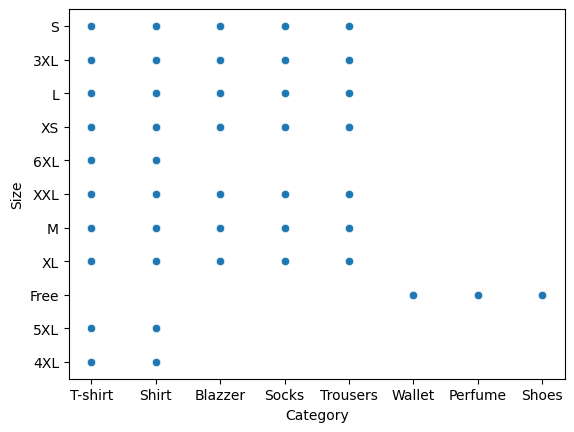

In [149]:
sns.scatterplot(x = df['Category'], y = df['Size'], palette = 'YlGnBu')
plt.show()

### Product Size Availability Analysis

Analyzing the size availability within each product category unveils interesting patterns. T-shirts and shirts stand out by offering a comprehensive range of sizes. Intriguingly, free size is exclusively available for wallets, perfumes, and shoes, perhaps catering to the versatile nature of these accessories. Blazzer, socks, and trousers showcase inclusivity with sizes ranging from S to 3XL, emphasizing a broad customer base. This nuanced size distribution not only aligns with fashion industry trends but also underscores the targeted sizing strategies employed across diverse product categories.


## Courier Sevice Status

Shipped - Delivered to Buyer     0.766141
Cancelled                        0.136776
Shipped - Returned to Seller     0.051927
Shipped - Picked Up              0.025937
Pending - Waiting for Pick Up    0.007491
Pending                          0.006478
Shipped - Returning to Seller    0.003865
Shipped - Out for Delivery       0.000933
Shipped - Rejected by Buyer      0.000293
Shipped - Lost in Transit        0.000133
Shipped - Damaged                0.000027
Name: Status, dtype: float64

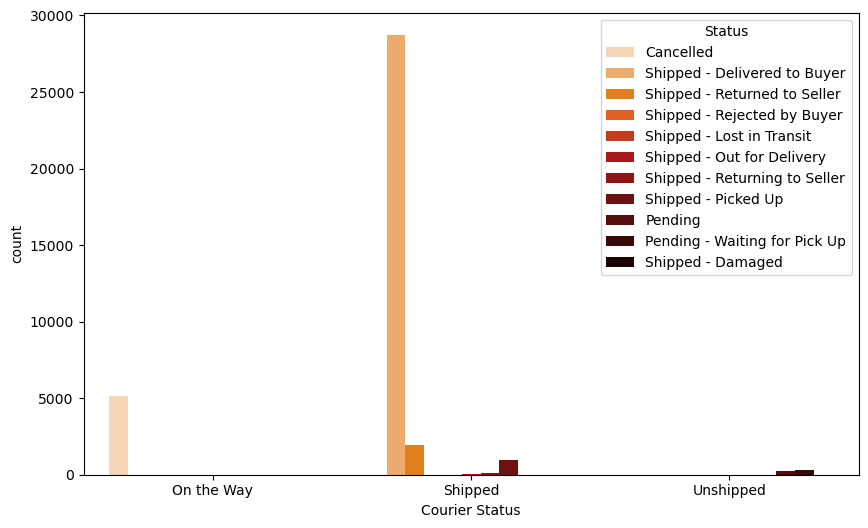

In [372]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Courier Status', data = df, hue = 'Status', palette = 'gist_heat_r' )

plt.show()

### Status Analysis

The analysis of courier status reveals that the majority of products have been successfully delivered, highlighting the efficiency and reliability of the delivery process.




## Delivered vs Cancelled Orders

In [236]:
Delivered = df.loc[df['Status'] == 'Shipped - Delivered to Buyer'].count()[0]

Cancelled = df.loc[df['Status'] == 'Cancelled'].count()[0]


5131

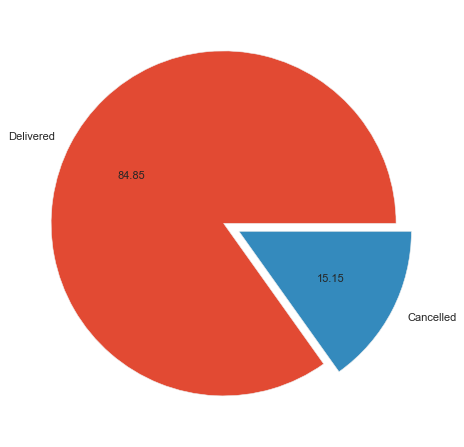

In [246]:
labels = ('Delivered', 'Cancelled')
plt.pie([Delivered, Cancelled], labels = labels, autopct = '%.2f', explode = (0,.1))
plt.style.use('ggplot')
plt.show()

### Order Status Analysis

Examining order statuses reveals a robust delivery success rate of 84.85%, signaling efficient fulfillment processes. However, a 15.15% cancellation rate suggests potential areas for improvement, emphasizing the need for enhanced order management to optimize the overall customer experience.

## Geographical Distribution

In [304]:
Top_10_State = df['ship-state'].value_counts().head(10)

In [305]:
Top_10_State

MAHARASHTRA       6236
KARNATAKA         4550
UTTAR PRADESH     3298
TAMIL NADU        3167
TELANGANA         3136
KERALA            2213
DELHI             1955
WEST BENGAL       1653
ANDHRA PRADESH    1621
Gujarat           1382
Name: ship-state, dtype: int64

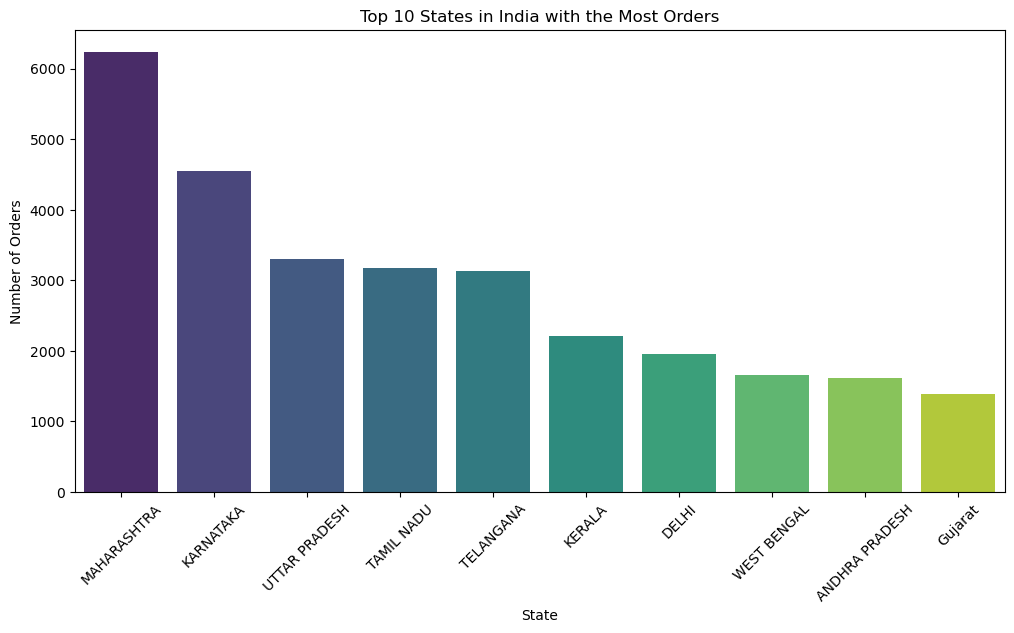

In [312]:
plt.figure(figsize=(12, 6))
sns.barplot(x=Top_10_State.index, y=Top_10_State.values, palette='viridis')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.title('Top 10 States in India with the Most Orders')
plt.xticks(rotation=45)
plt.show()

### Top 10 State Dynamics

Maharashtra's leading order count suggests a robust market influenced by factors like population density and economic activity. Karnataka follows, driven by Bengaluru's e-commerce influence. The substantial orders in populous states like Uttar Pradesh and Tamil Nadu indicate widespread customer engagement. Telangana's tech hub and Kerala's tech-savvy population likely contribute to their higher order numbers. Diverse economic activities in Delhi, West Bengal, Andhra Pradesh, and Gujarat impact their order volumes. Understanding these regional dynamics is crucial for tailored marketing and logistical strategies.

## B2B vs B2C

In [359]:
B2B_Check = df.loc[df['B2B'] == False].count()[0]
B2C_Check = df.loc[df['B2B'] == True].count()[0]

In [358]:
df['B2B'].value_counts()

False    37228
True       286
Name: B2B, dtype: int64

In [364]:
B2B_ = [B2B_Check, B2C_Check]
labels = ('B2B', 'B2C')
explode = (0,.5)

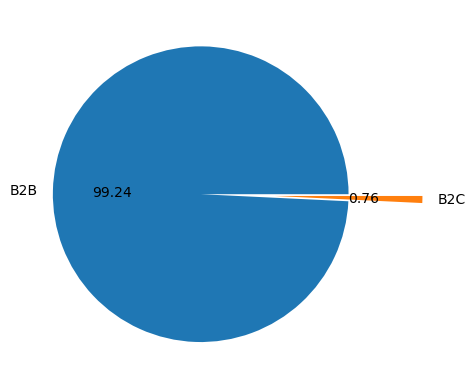

In [365]:
plt.pie(B2B_, labels = labels, autopct = '%.2f', explode = explode)
plt.show()

### Sales Trade Insight

The prevalence of 37228 non-B2B transactions, overshadowing 286 B2B transactions, underscores a consumer-driven trend in the sales report. This highlights the imperative for Amazon to prioritize strategies tailored to individual customers, ensuring optimized user experience and sustained revenue growth.

# Comprehensive Sales Landscape Analysis:

The data analysis unveils a strategic landscape where Maharashtra plays a pivotal role, potentially fueled by urban centers. The prominence of B2B transactions signifies a wholesale focus, requiring strong retailer partnerships. The reliance on Amazon's fulfillment highlights a commitment to efficiency. T-shirts, especially in M-Size, dominate, showcasing a keen understanding of market preferences. To harness these insights, targeted marketing in Maharashtra, optimizing Amazon fulfillment, and exploring T-shirt category diversification emerge as key pathways for sustained business growth.